# IIVP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [2]:
def display(images, labels, axis='off', cmap=None, figsize=(15,10)):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=figsize)
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1

## Exercise 2

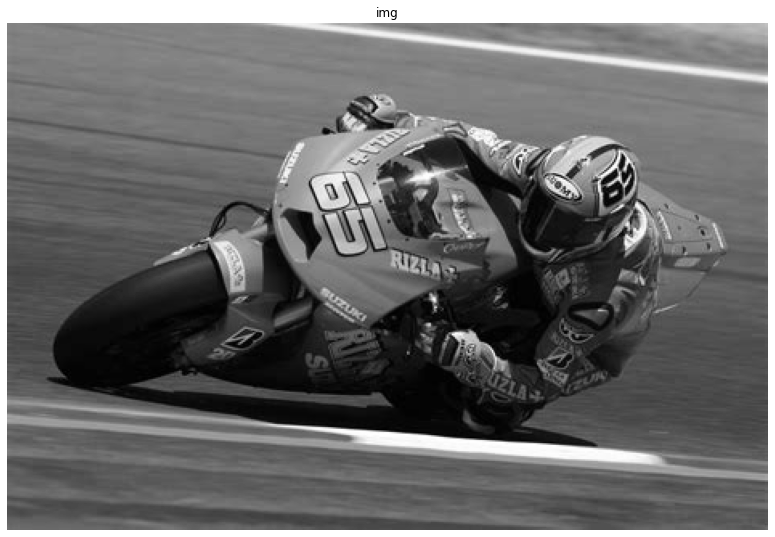

In [3]:
from scipy import fftpack
from numpy import pi
from numpy import r_

img = cv2.cvtColor(cv2.imread('images/motogp.jpeg'), cv2.COLOR_BGR2GRAY)

display([img],['img'], cmap='gray', figsize=(30,10))

## 2.1 Watermark Insertion

In [4]:
def dct2(a):
    return fftpack.dct( fftpack.dct( a.T, norm='ortho' ).T, norm='ortho' )


def dct(img, block_size=8):
    
    dct = np.zeros(img.shape)

    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            dct[i: i + block_size, j: j + block_size] = dct2(img[i:i+ block_size, j: j+ block_size])
            
    return dct

In [5]:
def idct2(a):
    return fftpack.idct( fftpack.idct( a.T , norm='ortho').T,norm='ortho')        
        
def idct(img_dct, block_size=8):
    
    img = np.zeros(img_dct.shape)
    
    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            img[i:(i + block_size), j:(j + block_size)] = idct2( img_dct[i:(i + block_size),j:(j + block_size)])
    
    return img

In [6]:
def apply_threshold(img_dct, threshold):
    
    return img_dct * (abs(img_dct) > (threshold * np.max(img_dct)))
    

### 2.1.1 - Compute the 2-D DCT

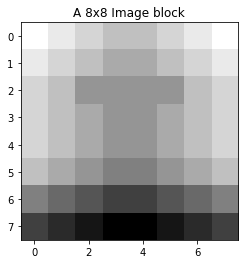

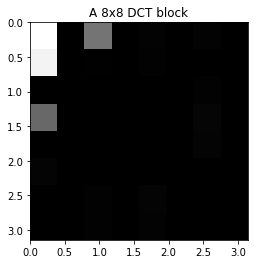

In [31]:
pos = 0
block_size=8

img_dct = dct(img)

# Extract a block from image
plt.figure()
plt.imshow(img[pos: pos + block_size, pos: pos + block_size], cmap='gray')
plt.title(f"A {block_size}x{block_size} Image block")

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[pos: pos + block_size, pos: pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"A {block_size}x{block_size} DCT block");

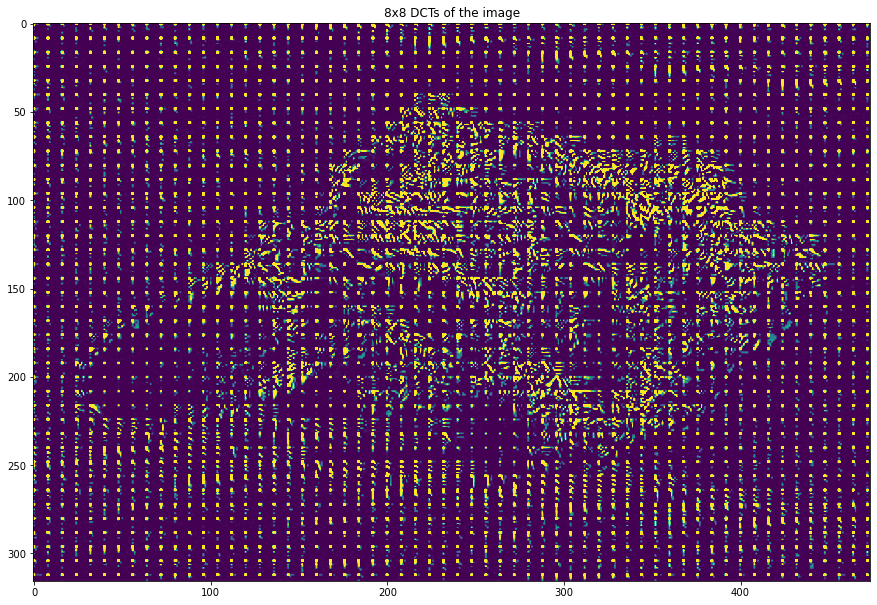

In [32]:
# Display entire DCT
plt.figure(figsize=(15,15))
plt.imshow(img_dct, vmax = np.max(img_dct)*0.01, vmin = 0)
plt.title( "8x8 DCTs of the image");

### 2.1.2 - Choose the $K$ Largest Coeficients 

In [33]:
x = [x * 0.0005 for x in range(1, 50)]
thresholds = {}
coeficients = {}

for key in x:
    thresholds[key] = apply_threshold(img_dct, key)
    coeficients[key] = 100 * np.sum(thresholds[key] != 0.0 ) / (img.shape[0] * img.shape[1] * 1.0)
    
    
# keys = list(thresholds.keys())
# imgs = list(thresholds.values())
# display(imgs, keys, cmap='gray', figsize=(15,25))

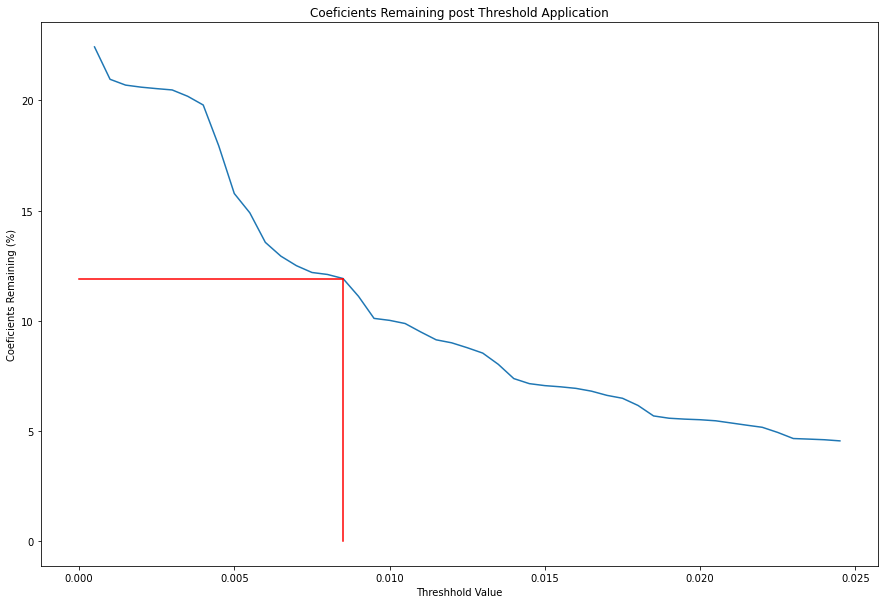

In [34]:
plt.figure(figsize=(15,10))
plt.plot(list(coeficients.keys()), list(coeficients.values()))
plt.plot([0.0085, 0.0085],[0, 11.9], 'r')
plt.plot([0, 0.0085],[11.9, 11.9], 'r')
plt.title('Coeficients Remaining post Threshold Application')
plt.xlabel('Threshhold Value')
plt.ylabel('Coeficients Remaining (%)');

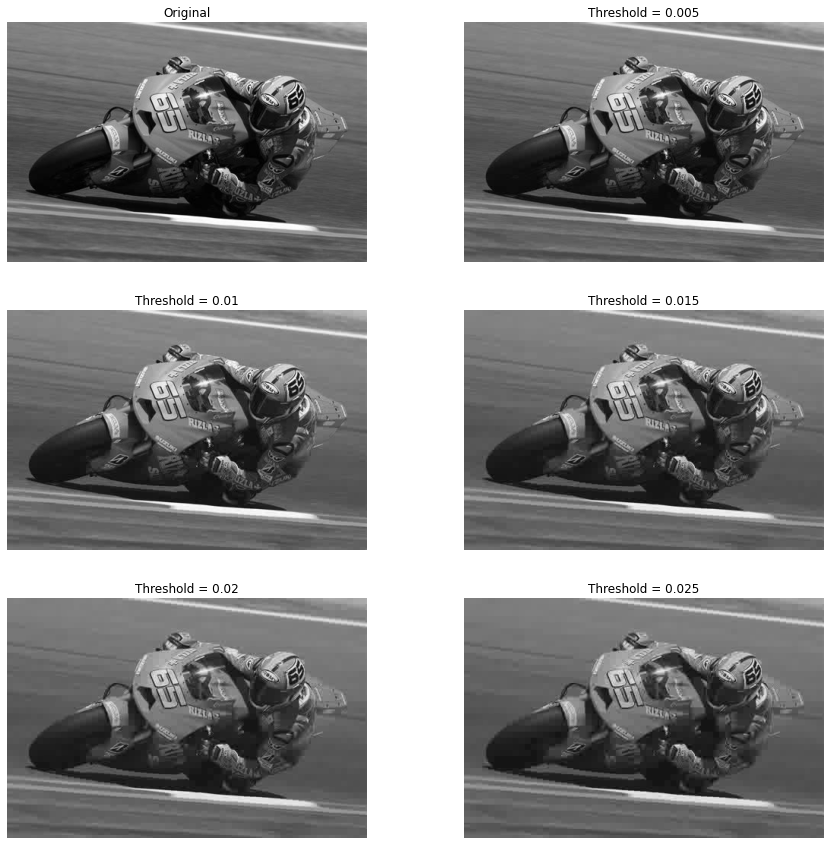

In [35]:
transformed = idct(apply_threshold(img_dct, 0.001))

display([img, 
         idct(apply_threshold(img_dct, 0.005)),
         idct(apply_threshold(img_dct, 0.01)),
         idct(apply_threshold(img_dct, 0.015)),
         idct(apply_threshold(img_dct, 0.02)),
         idct(apply_threshold(img_dct, 0.025))],
        ['Original',
         'Threshold = 0.005',
         'Threshold = 0.01',
         'Threshold = 0.015',
         'Threshold = 0.02',
         'Threshold = 0.025'],
        figsize=(15,15),
        cmap='gray')

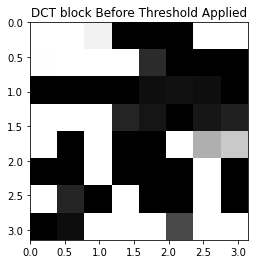

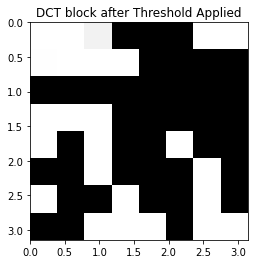

In [222]:
x_pos = 100
y_pos = 200
block_size=8

img_dct = dct(img)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])
plt.title(f"DCT block Before Threshold Applied");

img_dct_t = apply_threshold(img_dct, 0.0085)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct_t[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"DCT block after Threshold Applied");

### 2.1.3 - Create a watermark

In [276]:
mu = 0
sigma = 10
alpha = 1

w = alpha * np.random.default_rng().normal(size=(8, 8))
print(w)

[[-0.06633915  1.85968258  0.60462361 -1.14900833  0.08283903  0.92660454
   0.00335515  0.43893562]
 [-0.31118656 -0.50985909  1.13012155  0.32337686 -1.51503621 -0.26651665
  -0.33838866  1.14278213]
 [ 0.50316264  0.03505732 -0.22794723  0.86109972  0.95002662  2.08259449
   1.1641942   1.61359097]
 [-1.31073555 -1.81331915  0.97793736  0.54094146  1.21045555  0.28113341
   0.41633925 -0.64794671]
 [ 0.10954579  0.43354008 -2.11253575  0.9089251  -1.81529191 -0.15864319
   0.92773452  1.65373962]
 [ 0.74802073  1.25832193 -0.23904425 -0.89306168 -1.00044104 -0.44459327
   0.3680934   0.26937201]
 [-0.33117756  0.22461552  0.29380249 -1.05003124 -1.07523453  0.81540356
  -0.2403603  -0.58744544]
 [-1.13090675 -0.00625897 -0.1797723   0.91301351 -0.17402944 -0.11693788
   0.86468733  1.09764857]]


### 2.1.4 - Embed a Watermark

In [277]:
def apply_gaussian(block):
    
    out = np.zeros(block.shape)
    
    for i in range(block.shape[0]):
        for j in range(block.shape[1]):
            
            if abs(block[i, j]) != 0:
                    out[i, j] = block[i, j] + w[i, j]
                            
    out[0, 0] = block[0, 0]
    
    return out

In [278]:
def watermark(dct):
    
    img_w = dct
    
    for i in r_[:img_w.shape[0]: block_size]:
        for j in r_[:img_w.shape[1]: block_size]:
        
            img_w[i:(i + block_size), j:(j + block_size)] = apply_gaussian(dct[i:(i + block_size), j:(j + block_size)])
    
    return img_w

### 2.1.5 - Create the Watermarked DCT

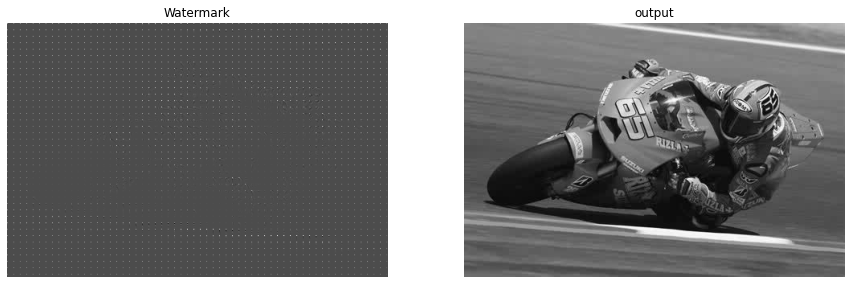

In [279]:
img_w = watermark(img_dct_t)

display([img_w, idct(img_w)],['Watermark', 'output'], cmap='gray')

### 2.1.6 - Comparison

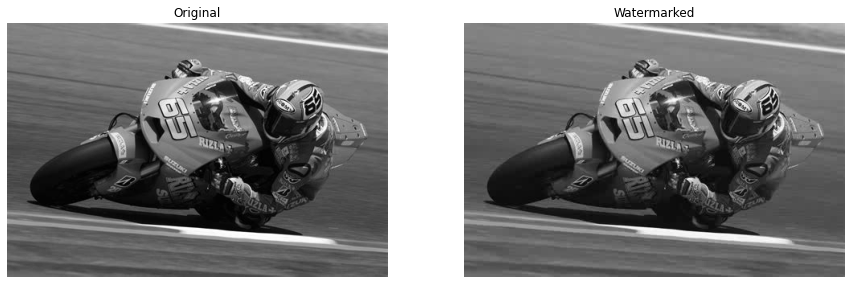

In [280]:
display([img, idct(img_w)], ['Original', 'Watermarked'], cmap='gray')

### 2.1.7 - Histogram

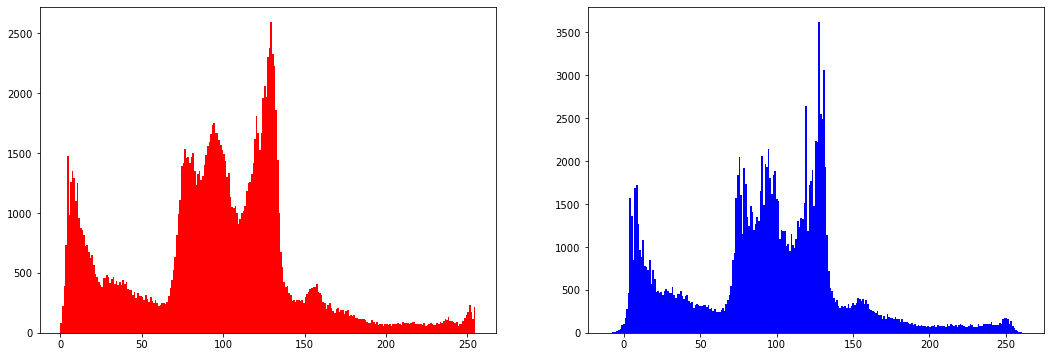

In [281]:
img_flattened = np.reshape(img, (img.shape[0] * img.shape[1],))
w_flattened = np.reshape(idct(img_w), (img_w.shape[0] * img_w.shape[1],))

fig = plt.figure(figsize=(18,6))
fig.add_subplot(1, 2, 1)
plt.hist(img_flattened, bins=255, color='red');
fig.add_subplot(1, 2, 2)
plt.hist(w_flattened, bins=255, color='blue');

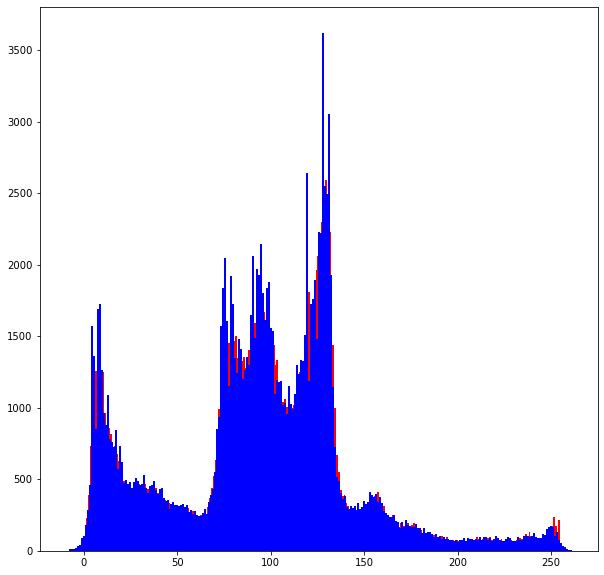

In [282]:
plt.figure(figsize=(10,10))
plt.hist(img_flattened, bins=255, color='red');
plt.hist(w_flattened, bins=255, color='blue');

### 2.1.8 - DC Coefficient
TODO - Explain

## 2.2 - Watermark Detection

### 2.2.1 - Compute the 2D DCT

In [283]:
mystery_1 = img
mystery_2 = idct(img_w)